In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Dataset

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
label_encoder = LabelEncoder()
  
df['Gender']= label_encoder.fit_transform(df['Gender'])
  
df['Gender'].unique()

array([1, 0])

Univariate Analysis

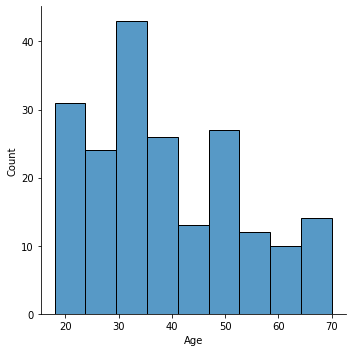

In [4]:
sns.displot(df["Age"])

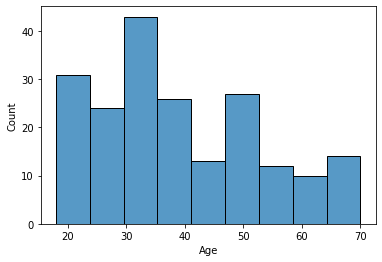

In [5]:
sns.histplot(x=df['Age'])

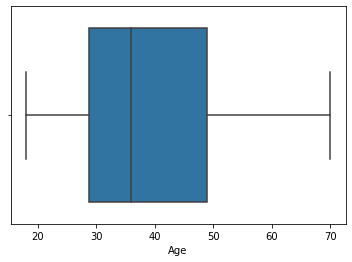

In [6]:
sns.boxplot(x=df['Age'])

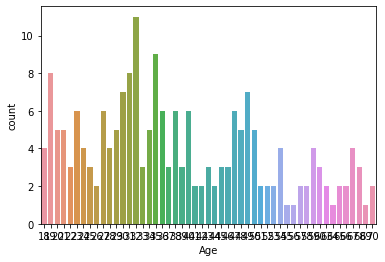

In [7]:
sns.countplot(x=df['Age']) 

Bivariate Analysis

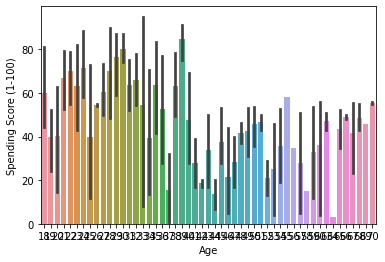

In [8]:
sns.barplot(x=df['Age'],y=df['Spending Score (1-100)'])

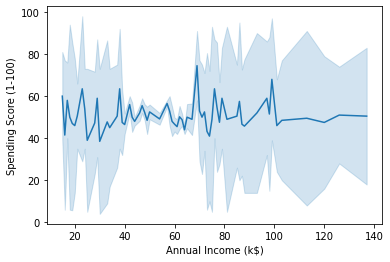

In [9]:
sns.lineplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

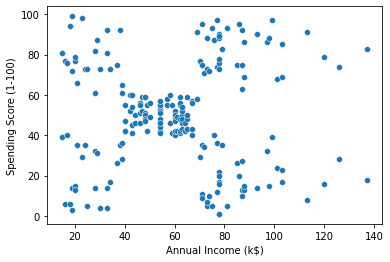

In [10]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

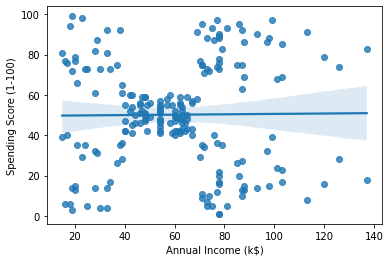

In [11]:
sns.regplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])

Multivariate Analysis

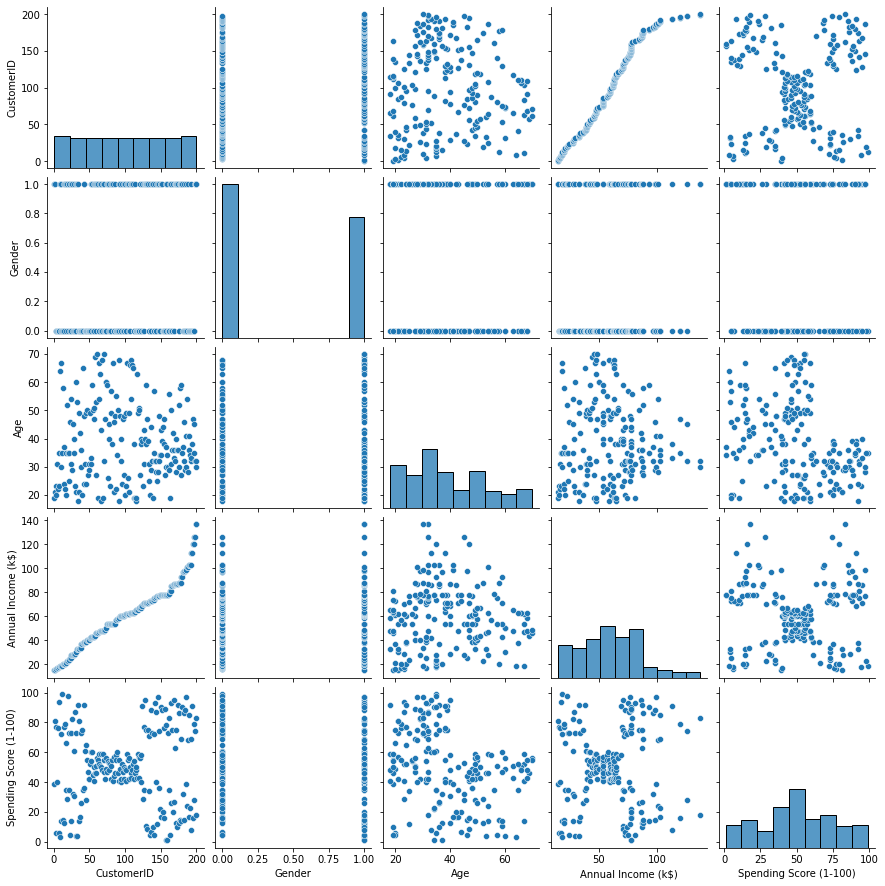

In [12]:
sns.pairplot(data=df)

Descriptive Statistics

In [13]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


Check Missing Values

In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool


Detect and Replace Outliers

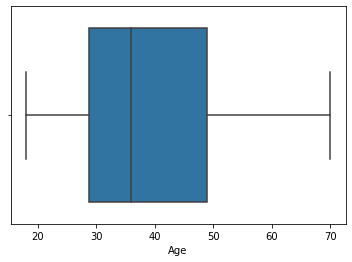

In [16]:
x = sns.boxplot(x=df["Age"])
x

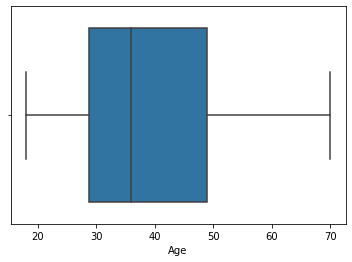

In [17]:
x = df.Age
sns.boxplot(x=x)

In [18]:
x = np.where(df['Age']>57,39, df['Age'])
x

array([19, 21, 20, 23, 31, 22, 35, 23, 39, 30, 39, 35, 39, 24, 37, 22, 35,
       20, 52, 35, 35, 25, 46, 31, 54, 29, 45, 35, 40, 23, 39, 21, 53, 18,
       49, 21, 42, 30, 36, 20, 39, 24, 48, 31, 49, 24, 50, 27, 29, 31, 49,
       33, 31, 39, 50, 47, 51, 39, 27, 53, 39, 19, 39, 54, 39, 18, 43, 39,
       19, 32, 39, 47, 39, 39, 39, 26, 45, 40, 23, 49, 57, 38, 39, 46, 21,
       48, 55, 22, 34, 50, 39, 18, 48, 40, 32, 24, 47, 27, 48, 20, 23, 49,
       39, 26, 49, 21, 39, 54, 39, 39, 39, 19, 38, 19, 18, 19, 39, 49, 51,
       50, 27, 38, 40, 39, 23, 31, 43, 40, 39, 38, 47, 39, 25, 31, 20, 29,
       44, 32, 19, 35, 57, 32, 28, 32, 25, 28, 48, 32, 34, 34, 43, 39, 44,
       38, 47, 27, 37, 30, 34, 30, 56, 29, 19, 31, 50, 36, 42, 33, 36, 32,
       40, 28, 36, 36, 52, 30, 39, 27, 39, 35, 37, 32, 46, 29, 41, 30, 54,
       28, 41, 36, 34, 32, 33, 38, 47, 35, 45, 32, 32, 30])

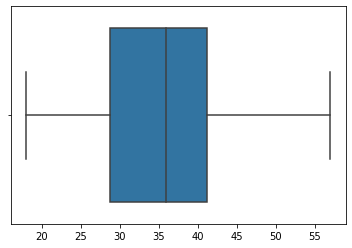

In [19]:
sns.boxplot(x=x)

Build Model

In [20]:
x = df.iloc[:, [3, 4]].values  

Clustering

In [21]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

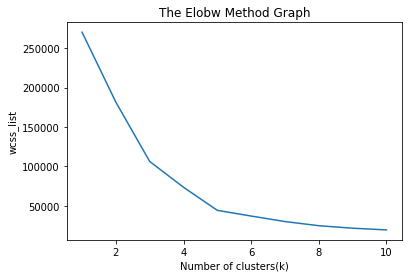

In [22]:
from sklearn.cluster import KMeans  
wcss_list= []     
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

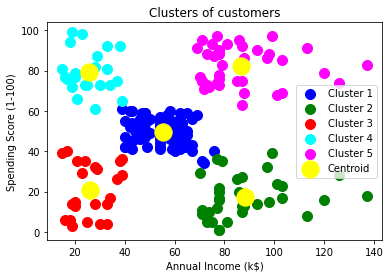

In [24]:
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  